In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
from scipy.signal import find_peaks
plt.style.use('..\informes.mplstyle')

c_sp_sat = 'C9'  # Color del setpoint y banda de no saturacion
ls_sat = ':'  # Linestyle de la señal saturada

P - Posición

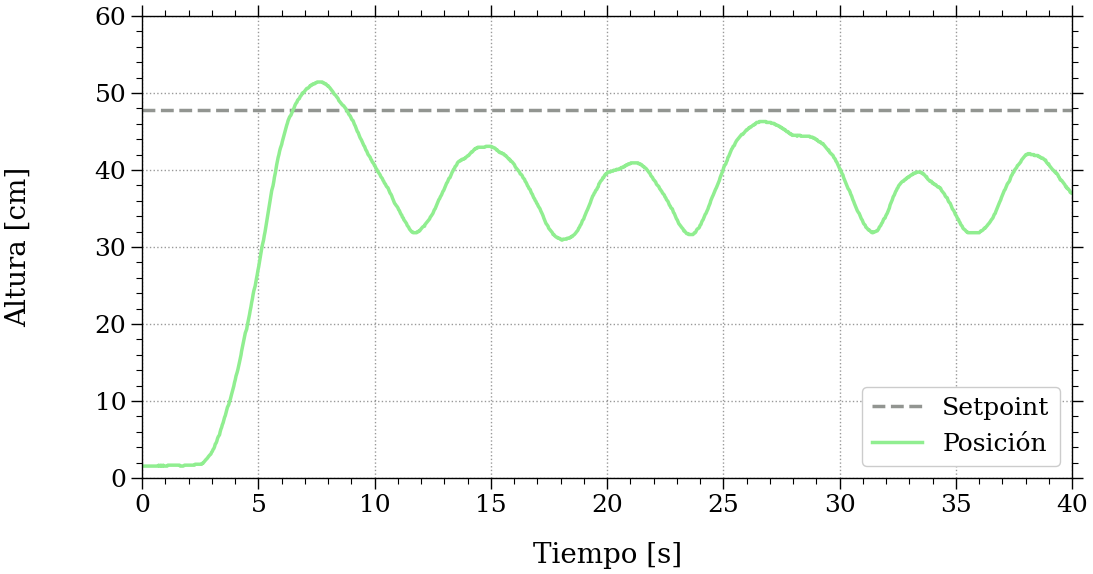

In [2]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= 40]

setpoint = df['Setpoint'][0]
pxlenght = df['Pixel Lenght'][0]
px2dist = lambda x: x * 71/pxlenght

t = df['Time'].values
h = px2dist(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]', labelpad=45)
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2dist(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\P-altura')
plt.show()

P - Señal

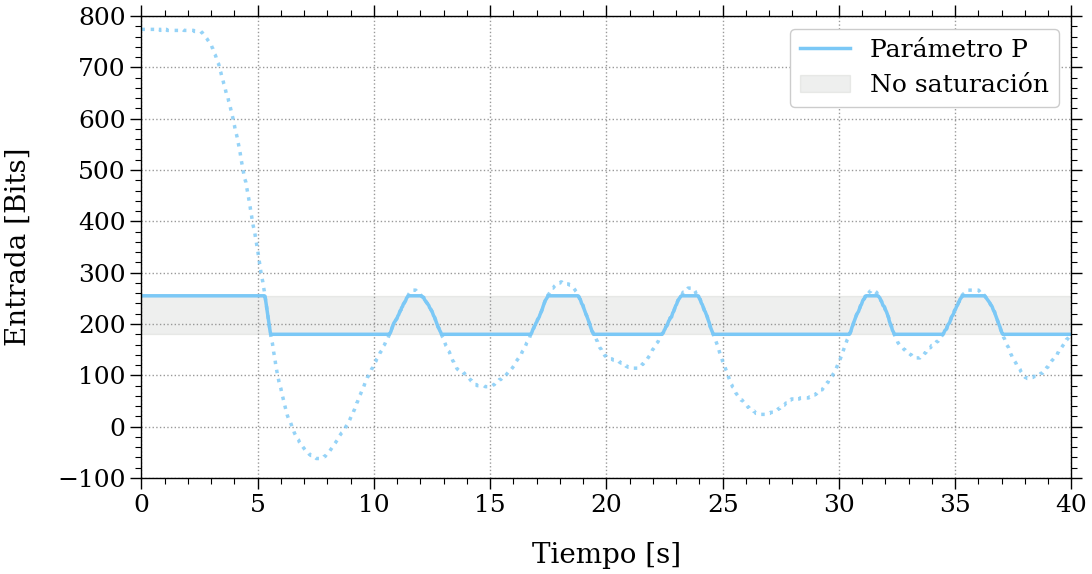

In [3]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = df['P'].values


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Entrada [Bits]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-100, 800)


# PLOTS

ax.plot(t, P, c='C1', ls=ls_sat, alpha=0.8)
P[P < 180] = 180
P[P > 255] = 255
ax.plot(t, P, c='C1', label='Parámetro P')
ax.fill_between([0, 45], 2*[180], 2*[255], color=c_sp_sat,
                alpha=0.15, label='No saturación')


ax.legend()
# fig.savefig('.\Figuras\P-señal')
plt.show()

PI - Posición

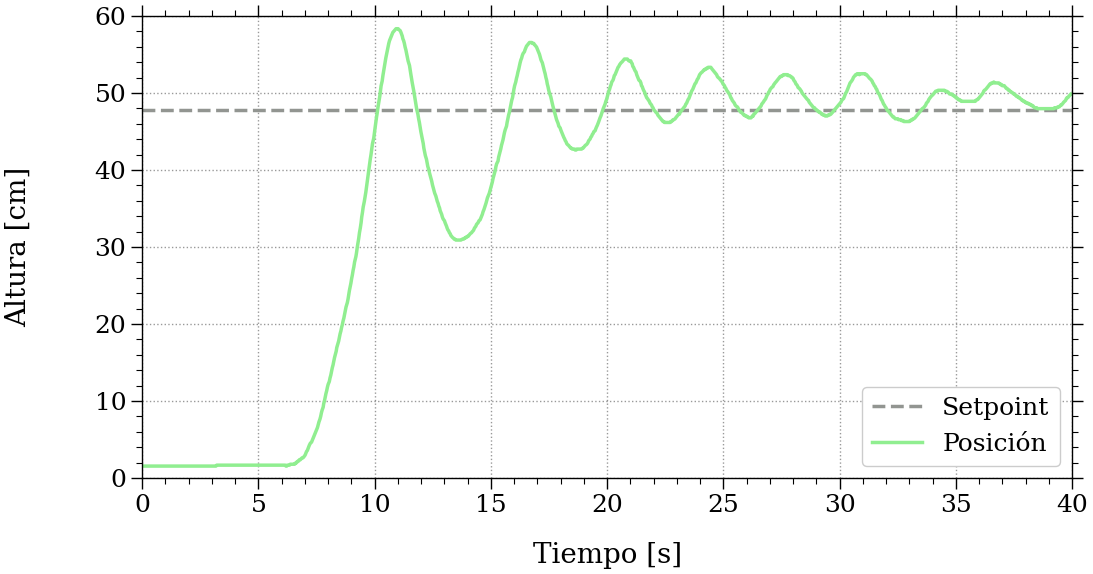

In [4]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
df = df[df['Time'] <= 40]

setpoint = df['Setpoint'][0]
pxlenght = df['Pixel Lenght'][0]
px2dist = lambda x: x * 71/pxlenght

t = df['Time'].values
h = px2dist(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]', labelpad=45)
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2dist(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\PI-altura')
plt.show()

PI - Señal

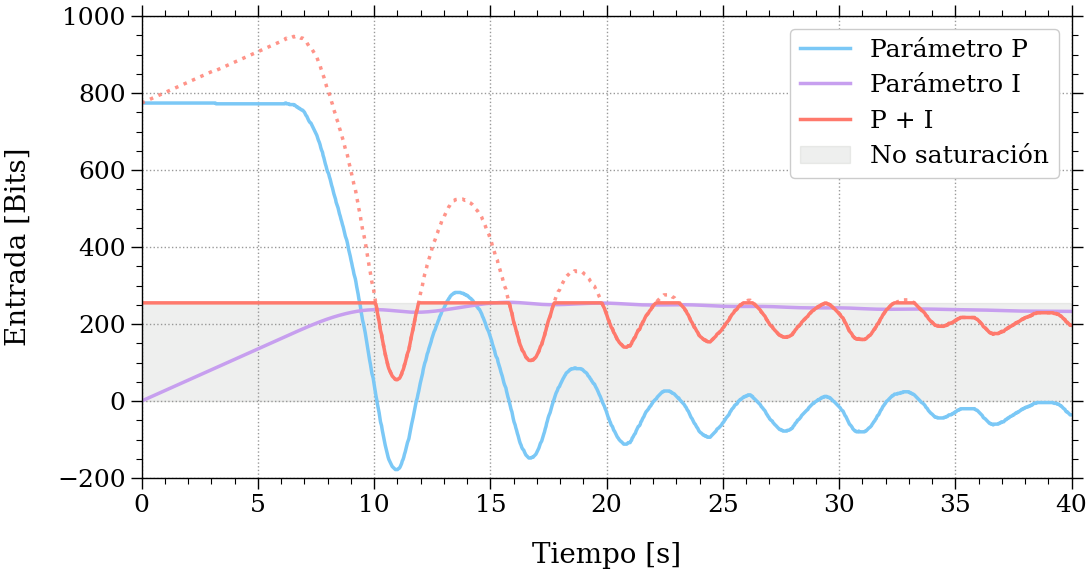

In [5]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-0-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = df['P'].values
I = df['I'].values
PI = P + I


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Entrada [Bits]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-200, 1000)


# PLOTS
# P
ax.plot(t, P, c='C1', label='Parámetro P')
# I
ax.plot(t, I, c='C2', label='Parámetro I')
# PI
ax.plot(t, PI, c='C3', ls=ls_sat, alpha=0.8)
PI[PI < 0] = 0
PI[PI > 255] = 255
ax.plot(t, PI, c='C3', label='P + I')

ax.fill_between([0, 45], 2*[0], 2*[255], color=c_sp_sat,
                   alpha=0.15, label='No saturación')


ax.legend()
# fig.savefig('.\Figuras\PI-señal')
plt.show()

PID - Posición

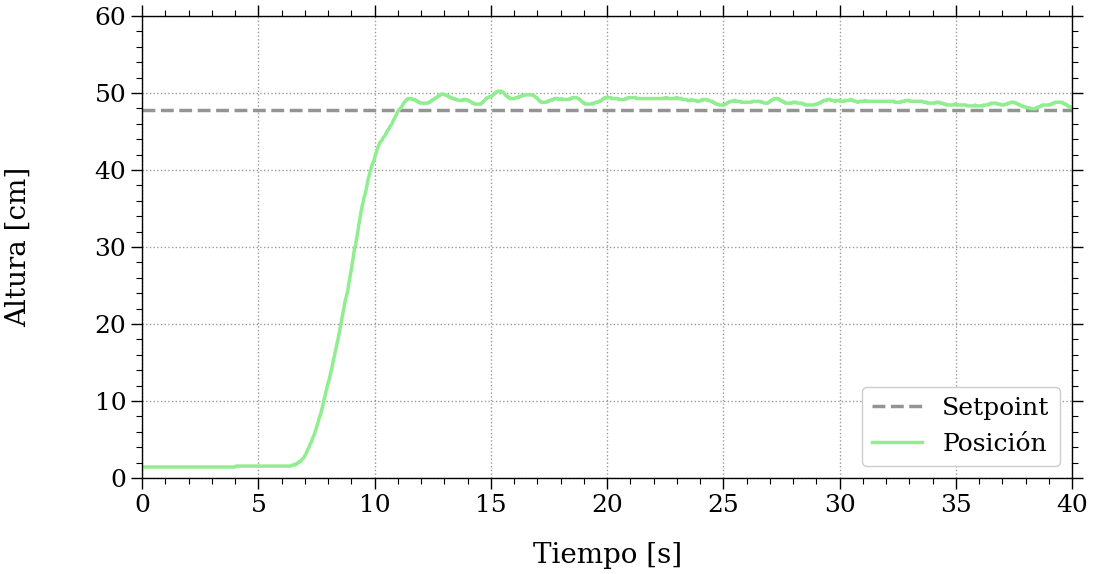

In [6]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] <= 40]

setpoint = df['Setpoint'][0]
pxlenght = df['Pixel Lenght'][0]
px2dist = lambda x: x * 71/pxlenght

t = df['Time'].values
h = px2dist(df['Position'].values)


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]', labelpad=45)
ax.set_xlim(0, 40)
ax.set_ylim(0, 60)


# PLOTS

ax.axhline(px2dist(setpoint), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\PID-altura')
plt.show()

PID - Señal

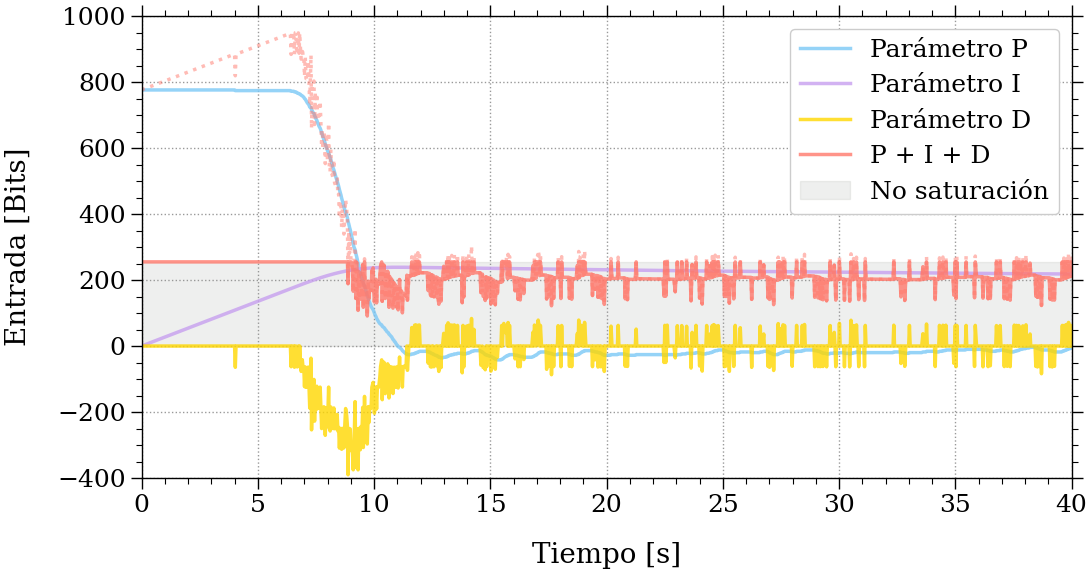

In [7]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0.07-2-barrido.csv')
df = df[df['Time'] <= 40]

t = df['Time'].values
P = df['P'].values
I = df['I'].values
D = df['D'].values
PID = P + I + D
D[D < -400] = -390


# FIGURA Y AXES

fig, ax = plt.subplots()

ax.set_ylabel('Entrada [Bits]')
ax.set_xlabel('Tiempo [s]')
ax.set_xlim(0, 40)
ax.set_ylim(-400, 1000)


# PLOTS

alpha_sat = 0.5
alpha_no_sat = 0.8

# P
ax.plot(t, P, c='C1', label='Parámetro P', alpha=alpha_no_sat)
# I
ax.plot(t, I, c='C2', label='Parámetro I', alpha=alpha_no_sat)
# D
ax.plot(t, D, c='C4', label='Parámetro D', alpha=alpha_no_sat)
# PID
ax.plot(t, PID, c='C3', ls=ls_sat, alpha=alpha_sat)
PID[PID < 0] = 0
PID[PID > 255] = 255
ax.plot(t, PID, c='C3', label='P + I + D', alpha=alpha_no_sat)

ax.fill_between([0, 45], 2*[0], 2*[255], color=c_sp_sat,
                   alpha=0.15, label='No saturación')


ax.legend()
# fig.savefig('.\Figuras\PID-señal')
plt.show()

On - Off

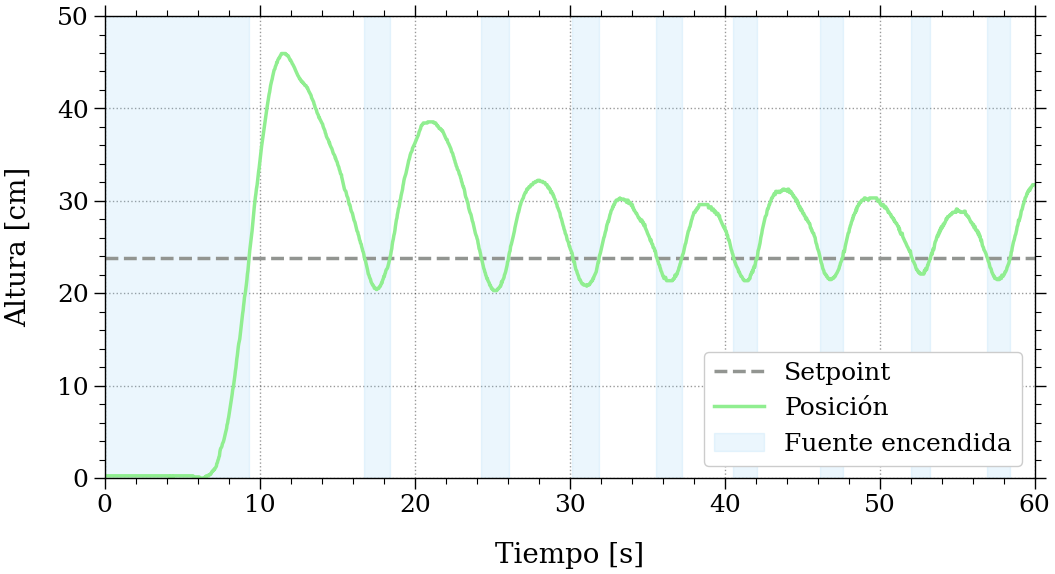

In [39]:
df = pd.read_csv('..\Mediciones\Clase 2\posiciones-onoff2.csv',
                 header=None, names=['Tiempo', 'Posicion', 'On-Off'])
# df = df[df['Tiempo'] <= 50]

px2dist = lambda x: x * 71/pxlenght

t = df['Tiempo'].values
t -= t[0]
h = px2dist(df['Posicion'].values)
onoff = df['On-Off'].values


# FIGURA Y AXES

fig, ax = plt.subplots()
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Altura [cm]')
ax.set_xlim(0, 60)
ax.set_ylim(0, 50)


# PLOTS Y PEAKS

ax.axhline(px2dist(200), c=c_sp_sat,
           ls='--', label='Setpoint')
ax.plot(t, h, label='Posición')


peaks = find_peaks(np.abs(np.diff(onoff)), threshold=0.5)[0]
peaks = np.insert(peaks, 0, 0)
for i in range(0, len(peaks)-1, 2):
    ax.fill_betweenx([0, 50], t[peaks[i]], t[peaks[i+1]],
                        color='C1', alpha=0.15)
ax.fill_betweenx([0, 50], t[peaks[-1]], t[-1],
                 color='C1', alpha=0.15, label='Fuente encendida')


ax.legend(loc='lower right')
# fig.savefig('.\Figuras\On-off')
plt.show()